In [1]:
# Advanced Machine Learning Techniques
# Assignment 2 - Application of NLP for sentiment analysis and entity relationships recognition.
# Meenakshy Liju

In [2]:
import pandas as pd

# Loading Dataset
file_path = 'file.csv'
data = pd.read_csv(file_path)

# Dataset info
print("Dataset Overview:")
print(data.info())
print("\nSample Data:")
print(data.head())

# Dataset Overview and Dimensionality
print("Dataset Shape:", data.shape)
print("\nColumn Information:")
print(data.dtypes)

# Numerical and Categorical Summary
print("\nNumerical Summary:")
print(data.describe())

print("\nCategorical Summary:")
print(data.describe(include='object'))

# Missing values
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  219294 non-null  int64 
 1   tweets      219294 non-null  object
 2   labels      219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB
None

Sample Data:
   Unnamed: 0                                             tweets   labels
0           0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1           1  Try talking with ChatGPT, our new AI system wh...     good
2           2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3           3  THRILLED to share that ChatGPT, our new model ...     good
4           4  As of 2 minutes ago, @OpenAI released their ne...      bad
Dataset Shape: (219294, 3)

Column Information:
Unnamed: 0     int64
tweets        object
labels        object
dtype: object

Numerical Summary:
         

<ipython-input-3-2612f4fe8e62>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')


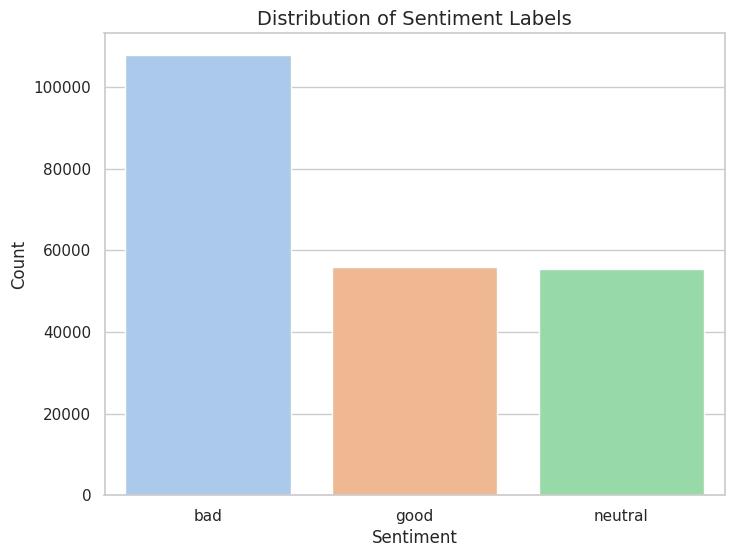

In [3]:
# Data Visualisation
# Label Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Set pastel color palette
sns.set_palette('pastel')
sns.set_theme(style='whitegrid')

# Plot label distribution
label_counts = data['labels'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')
plt.title('Distribution of Sentiment Labels', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()


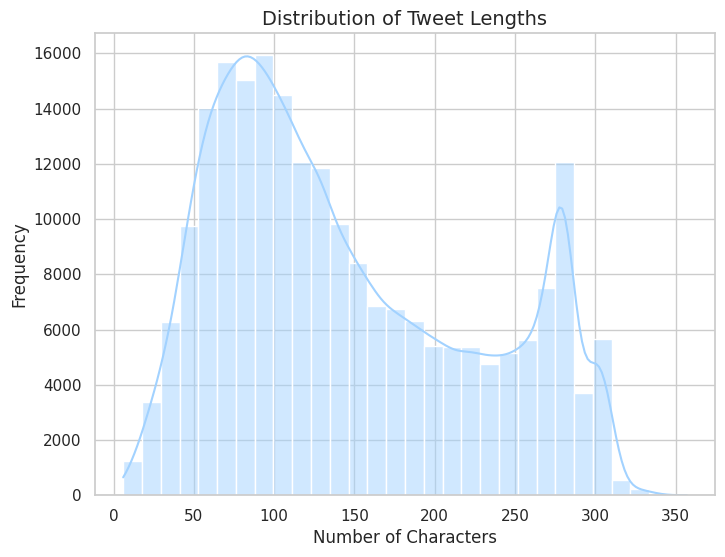


Sentiment Summary:
                mean          max          min        count
        tweet_length tweet_length tweet_length tweet_length
labels                                                     
bad       120.677316          357            6       107796
good      185.324829          342            6        56011
neutral   150.414764          341           10        55487


In [4]:
# Data Visualisation
# Tweet Length Distribution

# Separate column for length of tweet
data['tweet_length'] = data['tweets'].apply(len)

# Visualise tweet length distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['tweet_length'], bins=30, kde=True, color='#A2D2FF', edgecolor='white')
plt.title('Distribution of Tweet Lengths', fontsize=14)
plt.xlabel('Number of Characters', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Sentiment summary
sentiment_summary = data.pivot_table(index='labels', values='tweet_length',
                                     aggfunc=['mean', 'max', 'min', 'count'])
print("\nSentiment Summary:")
print(sentiment_summary)


<ipython-input-5-aca588deb812>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_length_by_label.index, y=avg_length_by_label.values, palette='pastel')


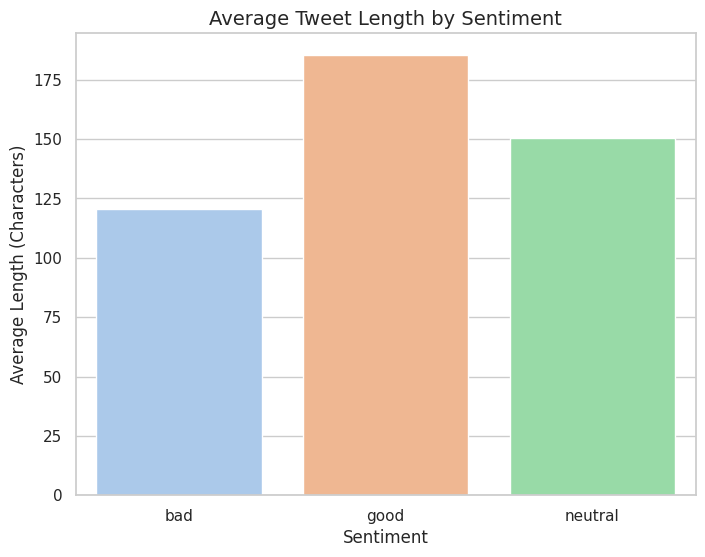

In [5]:
# Data Visualisation
# Average Tweet Length by Sentiment
# Group by sentiment and calculate mean tweet length
avg_length_by_label = data.groupby('labels')['tweet_length'].mean()

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_length_by_label.index, y=avg_length_by_label.values, palette='pastel')
plt.title('Average Tweet Length by Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Average Length (Characters)', fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [6]:
# Data Preprocessing
import nltk
nltk.download('punkt_tab')
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialise lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the preprocessing function
def preprocess_text(text):
    # Remove spam-like text
    spam_keywords = ['click play', 'leaked', 'click here', 'win', 'download now','buy now']
    if any(keyword in text.lower() for keyword in spam_keywords):
        return ''  # Return empty string for spam rows
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove non-alphabetic characters
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Apply lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    return " ".join(lemmatized_tokens)

# Apply preprocessing to the tweets column
data['cleaned_text'] = data['tweets'].apply(preprocess_text)
# Remove rows where cleaned_text is empty
data.dropna(subset=['cleaned_text'], inplace=True)
data = data[data['cleaned_text'].str.strip() != '']

# Verify preprocessing
print("\nCleaned Data Sample:")
print(data[['tweets', 'cleaned_text']].head())


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...



Cleaned Data Sample:
                                              tweets  \
0  ChatGPT: Optimizing Language Models for Dialog...   
1  Try talking with ChatGPT, our new AI system wh...   
2  ChatGPT: Optimizing Language Models for Dialog...   
3  THRILLED to share that ChatGPT, our new model ...   
4  As of 2 minutes ago, @OpenAI released their ne...   

                                        cleaned_text  
0  chatgpt optimizing language model dialogue openai  
1  try talking chatgpt new ai system optimized di...  
2  chatgpt optimizing language model dialogue ai ...  
3  thrilled share chatgpt new model optimized dia...  
4  minute ago openai released new chatgpt nnand u...  


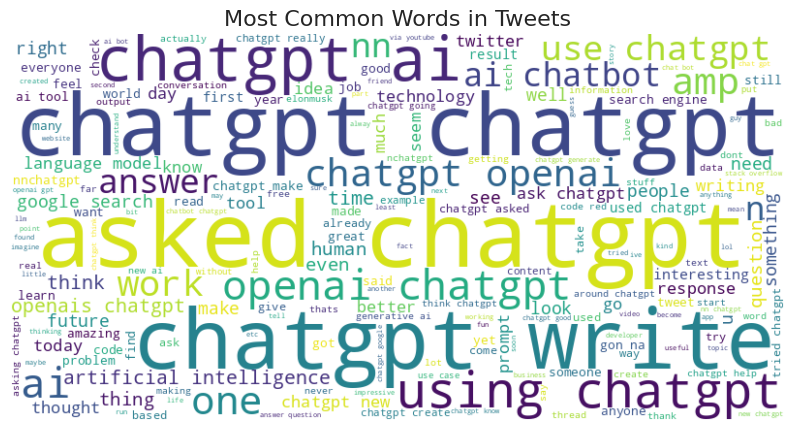

In [7]:
# Data Visualisation - using word clouds

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into one string
all_text = " ".join(data['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axes for better visualization
plt.title('Most Common Words in Tweets', fontsize=16)
plt.show()

from collections import Counter

# Split all cleaned text into individual words
all_words = " ".join(data['cleaned_text']).split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the top 10 most common words
top_20_words = word_counts.most_common(20)

# Display the results
print("Top 20 Most Common Words:")
for word, count in top_20_words:
    print(f"{word}: {count}")


In [8]:
# Ensure the 'cleaned_text' column is present and labels are encoded
data['labels_encoded'] = data['labels'].map({'good': 1, 'neutral': 0, 'bad': -1})

# Define common terms to exclude
common_terms = [
    'chatgpt', 'gpt', 'one', 'first', 'today', 'year', 'english', 'mca', 'fed', 'nna',
    'quora launch', 'gm', 'gpt gpt', 'google v', 'chatgpt prof ai', 'google chatgpt',
    'dec', 'chatgpt gpt', 'plato', 'kevin', 'bro', 'eth doge usdt btc web'
]

def remove_common_terms(text):
    return ' '.join(word for word in text.split() if word.lower() not in common_terms)

# Remove common terms
data['cleaned_text'] = data['cleaned_text'].apply(remove_common_terms)

# Normalize certain terms
def normalize_terms(text):
    replacements = {
        'ai': 'artificial intelligence',
        'quantum': 'quantum computing',
        'quantum computing': 'quantum computing',
        'artificial intelligence': 'artificial intelligence'
    }
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

data['cleaned_text'] = data['cleaned_text'].apply(normalize_terms)


Top 20 Most Common Words:
chatgpt: 203300
ai: 47865
openai: 18725
like: 15707
write: 13795
google: 13407
new: 13280
asked: 12370
using: 10650
use: 10378
answer: 9534
question: 8985
make: 8874
get: 8793
code: 8790
time: 8570
know: 8528
good: 8318
im: 8311
chatbot: 8271


In [9]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
import time
from sklearn.model_selection import GridSearchCV, cross_val_score

In [10]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X = vectorizer.fit_transform(data['cleaned_text']).toarray()

# Labels
y = data['labels_encoded']


In [11]:
# Hyperparameter Tuning with GridSearchCV
def tune_hyperparameters(X, y):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    rf_model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X, y)
    print(f"Best Parameters for Random Forest model: {grid_search.best_params_}")
    return grid_search.best_estimator_


In [12]:
# Train and Evaluate Model
rf_model = tune_hyperparameters(X, y)

# Cross-Validation Scores
cv_scores = cross_val_score(rf_model, X, y, cv=3, scoring='f1_weighted')
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {np.mean(cv_scores)}")


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters for Random Forest model: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Cross-Validation F1 Scores: [0.74157888 0.7364668  0.72318919]
Mean F1 Score: 0.7337449577716318


In [13]:
# Run Random Forest Evaluation
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
end_time = time.time()

# Display Evaluation Metrics
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
    "recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
    "f1_score": f1_score(y_test, y_pred, average='weighted', zero_division=0),
    "confusion_matrix": confusion_matrix(y_test, y_pred).tolist()
}

print("Random Forest Evaluation Metrics:")
print(metrics)

Random Forest Evaluation Metrics:
{'accuracy': 0.7675953768088705, 'precision': 0.7610374662191198, 'recall': 0.7675953768088705, 'f1_score': 0.7624447512785787, 'confusion_matrix': [[18953, 1286, 807], [2809, 6183, 1824], [1308, 1859, 7539]]}


In [14]:
# Save Evaluation Metrics to CSV
rf_metrics_df = pd.DataFrame([metrics])
rf_metrics_df.to_csv('rf_evaluation_metrics.csv', index=False)
print(f"Random Forest evaluation completed in {end_time - start_time:.2f} seconds.")
print("Results saved to 'rf_evaluation_metrics.csv'.")


Random Forest evaluation completed in 1394.63 seconds.
Results saved to 'rf_evaluation_metrics.csv'.


In [15]:
# Extract Top Entities Based on Frequency
# Count occurrences of potential entities
word_counts = Counter(" ".join(data['cleaned_text']).split())

# Select top 10 entities based on frequency
top_entities = [word for word, count in word_counts.most_common(10) if word not in ['new', 'using', 'use', 'write', 'like', 'asked']]

# Predefined Entities
def predefined_entities():
    return [
        'artificial intelligence',
        'google',
        'elon musk',
        'stack overflow',
        'openai',
        'quantum computing',
        'sam altman',
        'microsoft'
    ]

all_entities = predefined_entities()
print(f"Tracking the following entities: {all_entities}")


Tracking the following entities: ['artificial intelligence', 'google', 'elon musk', 'stack overflow', 'openai', 'quantum computing', 'sam altman', 'microsoft']


In [16]:
# Function to calculate entity-specific sentiment distribution
def calculate_entity_sentiment(data, entities):
    entity_sentiment = {}
    for entity in entities:
        entity_texts = data[data['cleaned_text'].str.contains(entity, case=False, na=False)]
        sentiment_counts = entity_texts['labels'].value_counts().to_dict()
        entity_sentiment[entity] = sentiment_counts
    return entity_sentiment

# Calculate Sentiment for Combined Entities
entity_sentiment_rf = calculate_entity_sentiment(data, all_entities)


In [17]:
import joblib
# Save Random Forest Model
joblib.dump(rf_model, 'rf_model.pkl')
print("Random Forest model saved as 'rf_model.pkl'.")


Random Forest model saved as 'rf_model.pkl'.


In [18]:
# Export Evaluation Results for Dashboard
rf_metrics_df = pd.DataFrame([metrics])  # Save as a single-row DataFrame
rf_metrics_df.to_csv('rf_evaluation_metrics.csv', index=False)
print("Random Forest evaluation metrics saved to 'rf_evaluation_metrics.csv'.")

# Export Entity-Specific Sentiment for Dashboard
entity_sentiment_df = pd.DataFrame([
    {"Entity": entity, "Sentiment": sentiment, "Count": count}
    for entity, sentiments in entity_sentiment_rf.items()
    for sentiment, count in sentiments.items()
])

entity_sentiment_df.to_csv('entity_sentiment_rf.csv', index=False)
print("Entity-specific sentiment results saved to 'entity_sentiment_rf.csv'.")


Random Forest evaluation metrics saved to 'rf_evaluation_metrics.csv'.
Entity-specific sentiment results saved to 'entity_sentiment_rf.csv'.


In [19]:
# Deep Learning Model

In [20]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModelForTokenClassification
import pandas as pd
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time


In [21]:
# Load Sentiment Analysis Model and Tokenizer
sentiment_model_name = 'cardiffnlp/twitter-roberta-base-sentiment'
sentiment_tokenizer = AutoTokenizer.from_pretrained(sentiment_model_name)
sentiment_model = AutoModelForSequenceClassification.from_pretrained(sentiment_model_name).to('cuda' if torch.cuda.is_available() else 'cpu')

# Load NER Model and Tokenizer
ner_model_name = 'dbmdz/bert-large-cased-finetuned-conll03-english'
ner_tokenizer = AutoTokenizer.from_pretrained(ner_model_name)
ner_model = AutoModelForTokenClassification.from_pretrained(ner_model_name).to('cuda' if torch.cuda.is_available() else 'cpu')

# Sentiment Label Mapping
sentiment_label_mapping = {0: 'bad', 1: 'neutral', 2: 'good'}


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
# Split Data for 80:20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['labels'], test_size=0.2, random_state=42)

# Optimized Batch Sentiment Analysis Function
def batch_sentiment_analysis(texts, batch_size=128):
    sentiment_results = []
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]

        # Tokenize batch
        inputs = sentiment_tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=512).to(device)

        # Model inference
        with torch.no_grad():
            outputs = sentiment_model(**inputs)
            probs = F.softmax(outputs.logits, dim=-1)
            preds = torch.argmax(probs, dim=-1)

        # Map predictions to labels
        batch_results = [sentiment_label_mapping[label.item()] for label in preds]
        sentiment_results.extend(batch_results)

    return sentiment_results

# Run Sentiment Analysis
print("Running Optimized BERT Sentiment Analysis...")
data['bert_sentiment'] = batch_sentiment_analysis(data['cleaned_text'].tolist())
print(data[['cleaned_text', 'bert_sentiment']].head())


Running Optimized BERT Sentiment Analysis...
                                        cleaned_text bert_sentiment
0  optimizing language model dialogue openartific...        neutral
1  try talking new artificial intelligence system...           good
2  optimizing language model dialogue artificial ...        neutral
3  thrilled share new model optimized dialog publ...           good
4  minute ago openartificial intelligence release...        neutral


In [23]:
# Optimized Batch NER Function
def batch_ner_analysis(texts, batch_size=128):
    ner_results = []
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]

        # Tokenize batch
        inputs = ner_tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=512).to(device)

        # Model inference
        with torch.no_grad():
            outputs = ner_model(**inputs)
            predictions = torch.argmax(outputs.logits, dim=-1)

        # Decode and extract entities
        for text, prediction in zip(batch_texts, predictions):
            tokens = ner_tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
            entities = [
                (token, ner_model.config.id2label[label.item()])
                for token, label in zip(tokens, prediction)
                if ner_model.config.id2label[label.item()].startswith('B-')
            ]
            ner_results.append(entities)

    return ner_results

# Run NER Analysis
print("Running Optimized BERT NER...")
data['bert_entities'] = batch_ner_analysis(data['cleaned_text'].tolist())
print(data[['cleaned_text', 'bert_entities']].head())


Running Optimized BERT NER...
                                        cleaned_text bert_entities
0  optimizing language model dialogue openartific...            []
1  try talking new artificial intelligence system...            []
2  optimizing language model dialogue artificial ...            []
3  thrilled share new model optimized dialog publ...            []
4  minute ago openartificial intelligence release...            []


In [24]:
# Define Predefined Entities
predefined_entities = [
    'artificial intelligence', 'google', 'elon musk', 'stack overflow', 'openai', 'quantum computing', 'sam altman', 'microsoft'
]

# Aggregate Sentiments by Entity
entity_sentiment_bert = {}
for entity in predefined_entities:
    entity_texts = data[data['cleaned_text'].str.contains(entity, case=False, na=False)]['bert_sentiment']
    entity_sentiment_bert[entity] = entity_texts.value_counts().to_dict()

# Display Entity-Specific Sentiment Results
print("Entity-Specific Sentiment Analysis Results (BERT):")
for entity, sentiment in entity_sentiment_bert.items():
    print(f"{entity}: {sentiment}")


Entity-Specific Sentiment Analysis Results (BERT):
artificial intelligence: {'neutral': 55791, 'good': 19292, 'bad': 8992}
google: {'neutral': 8748, 'good': 2273, 'bad': 1748}
elon musk: {'neutral': 717, 'good': 118, 'bad': 101}
stack overflow: {'neutral': 672, 'bad': 230, 'good': 89}
openai: {}
quantum computing: {'neutral': 210, 'good': 53, 'bad': 10}
sam altman: {'neutral': 135, 'good': 25, 'bad': 9}
microsoft: {'neutral': 351, 'good': 107, 'bad': 38}


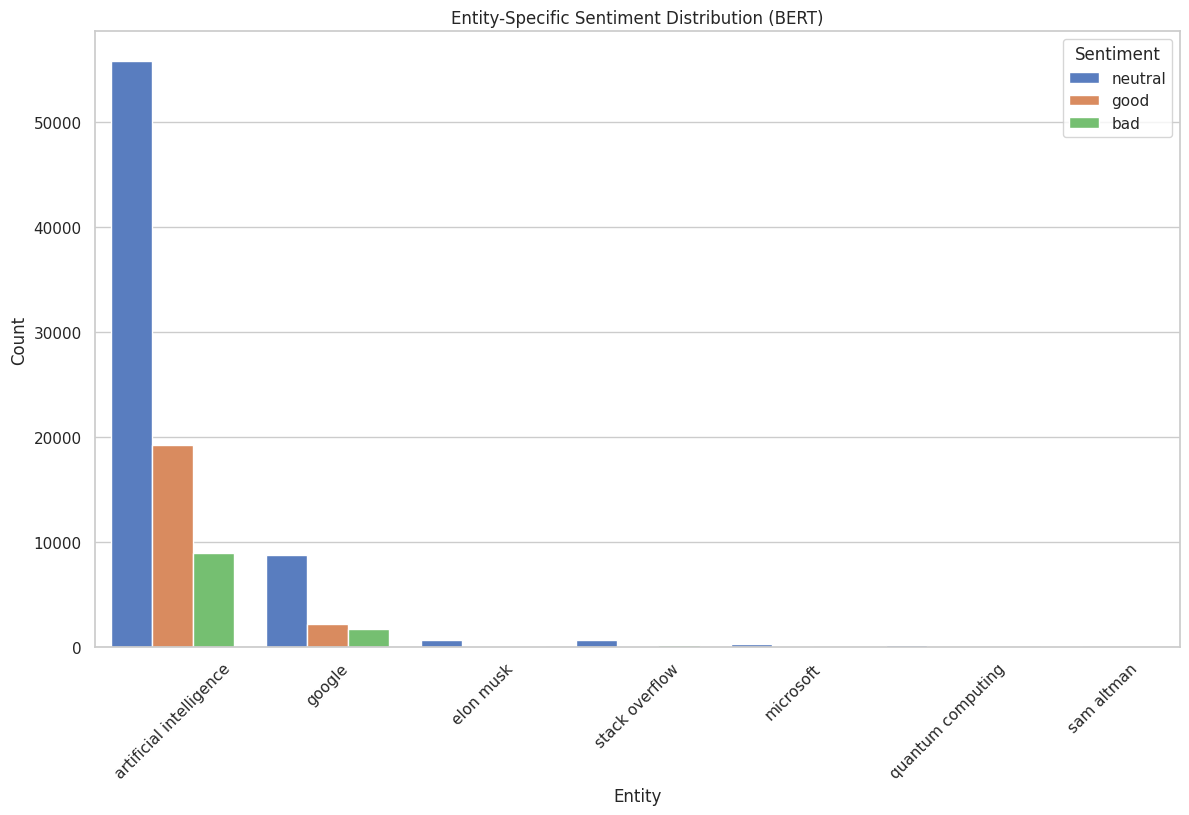

Entity-specific sentiment results saved to 'bert_entity_sentiment_results.csv'.


In [25]:
# Prepare Data for Visualization
bert_sentiment_df = pd.DataFrame([
    {'Entity': entity, 'Sentiment': sentiment, 'Count': count}
    for entity, sentiments in entity_sentiment_bert.items()
    for sentiment, count in sentiments.items()
])

# Sort entities for better visualization
bert_sentiment_df = bert_sentiment_df.sort_values(by='Count', ascending=False)

# Plot Sentiment Distribution
plt.figure(figsize=(14, 8))
sns.barplot(x='Entity', y='Count', hue='Sentiment', data=bert_sentiment_df, palette='muted')
plt.title('Entity-Specific Sentiment Distribution (BERT)')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

# Save the results for further analysis
bert_sentiment_df.to_csv('bert_entity_sentiment_results.csv', index=False)
print("Entity-specific sentiment results saved to 'bert_entity_sentiment_results.csv'.")

In [26]:
# Save BERT Sentiment Model
sentiment_model.save_pretrained('bert_sentiment_model')
sentiment_tokenizer.save_pretrained('bert_sentiment_model')
print("BERT sentiment model and tokenizer saved in the 'bert_sentiment_model/' directory.")

# Save BERT NER Model
ner_model.save_pretrained('bert_ner_model')
ner_tokenizer.save_pretrained('bert_ner_model')
print("BERT NER model and tokenizer saved in the 'bert_ner_model/' directory.")


BERT sentiment model and tokenizer saved in the 'bert_sentiment_model/' directory.
BERT NER model and tokenizer saved in the 'bert_ner_model/' directory.


In [27]:
# Evaluate BERT Sentiment Analysis
# Map true labels and predicted labels to integers
label_mapping = {'bad': 0, 'neutral': 1, 'good': 2}
data['true_labels'] = data['labels'].map(label_mapping)
predicted_labels = data['bert_sentiment'].map(label_mapping)

# Calculate evaluation metrics
accuracy_bert = accuracy_score(data['true_labels'], predicted_labels)
precision_bert = precision_score(data['true_labels'], predicted_labels, average='weighted', zero_division=0)
recall_bert = recall_score(data['true_labels'], predicted_labels, average='weighted', zero_division=0)
f1_bert = f1_score(data['true_labels'], predicted_labels, average='weighted', zero_division=0)
conf_matrix_bert = confusion_matrix(data['true_labels'], predicted_labels)

# Metrics dictionary
bert_metrics = {
    "accuracy": accuracy_bert,
    "precision": precision_bert,
    "recall": recall_bert,
    "f1_score": f1_bert,
    "confusion_matrix": conf_matrix_bert.tolist()
}

# Print metrics
print(f"Accuracy: {accuracy_bert:.2f}")
print(f"Precision: {precision_bert:.2f}")
print(f"Recall: {recall_bert:.2f}")
print(f"F1-Score: {f1_bert:.2f}")
print("Confusion Matrix:")
print(conf_matrix_bert)

# Save Evaluation Metrics for BERT
bert_metrics_df = pd.DataFrame([bert_metrics])
bert_metrics_df.to_csv('bert_final_results.csv', index=False)
print("BERT evaluation metrics saved to 'bert_final_results.csv'.")


Accuracy: 0.41
Precision: 0.58
Recall: 0.41
F1-Score: 0.39
Confusion Matrix:
[[20054 80726  4622]
 [ 5431 37482 11109]
 [ 2634 22080 28700]]
BERT evaluation metrics saved to 'bert_final_results.csv'.


In [28]:
# Combining Results for Flask Dashboard

rf_metrics_df = pd.read_csv('rf_evaluation_metrics.csv')
bert_metrics_df = pd.read_csv('bert_final_results.csv')

# Adding a column to distinguish models
rf_metrics_df['Model'] = 'Random Forest'
bert_metrics_df['Model'] = 'BERT'

combined_metrics = pd.concat([rf_metrics_df, bert_metrics_df], ignore_index=True)

# Save combined metrics to CSV
combined_metrics.to_csv('model_comparison.csv', index=False)
print("Combined model comparison results saved.")

print(combined_metrics)


Combined model comparison results saved.
   accuracy  precision    recall  f1_score  \
0  0.767595   0.761037  0.767595  0.762445   
1  0.405172   0.583106  0.405172  0.393904   

                                    confusion_matrix          Model  
0  [[18953, 1286, 807], [2809, 6183, 1824], [1308...  Random Forest  
1  [[20054, 80726, 4622], [5431, 37482, 11109], [...           BERT  


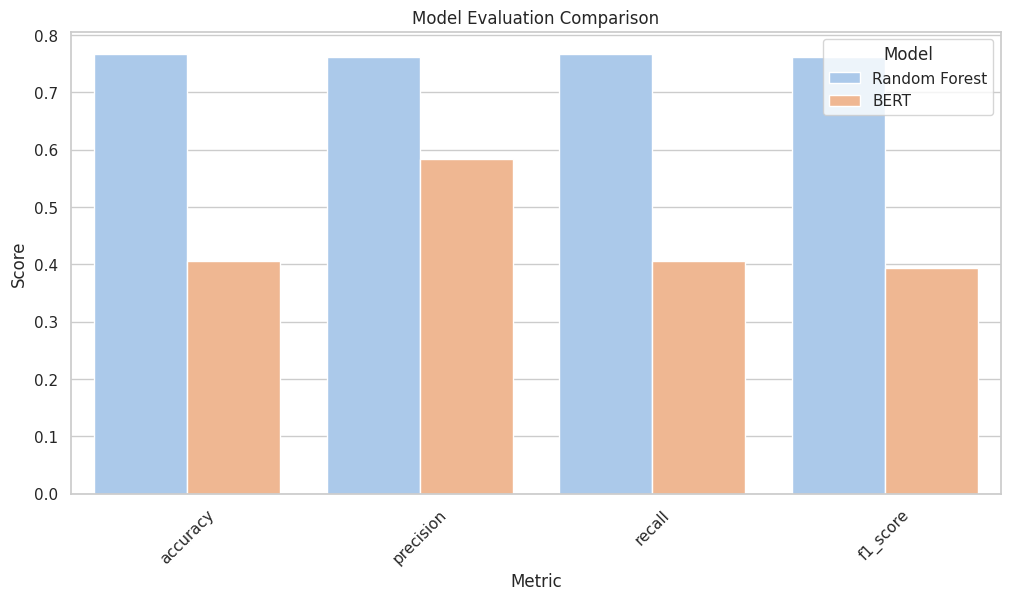

In [29]:
# Comparison Plot

combined_metrics = pd.read_csv('model_comparison.csv')
# Exclude the 'confusion_matrix' column
evaluation_results_melted = pd.melt(
    combined_metrics.drop(columns=['confusion_matrix']),
    id_vars='Model',
    var_name='Metric',
    value_name='Score'
)


# Barplot for model comparison
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Metric',
    y='Score',
    hue='Model',
    data=evaluation_results_melted,
    palette='pastel'
)
plt.title('Model Evaluation Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.show()


In [30]:
# Save Sentiment Summary for Flask
sentiment_summary = data.groupby(['bert_sentiment'])['bert_sentiment'].count().reset_index(name='count')

# Save sentiment summary to CSV file
sentiment_summary.to_csv('sentiment_summary.csv', index=False)
print("Sentiment summary file saved.")


Sentiment summary file saved.


In [31]:
# Downloading BERT Models
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
!cp -r bert_ner_model /content/drive/MyDrive/

In [33]:
!cp -r bert_sentiment_model /content/drive/MyDrive/



In [97]:
# Code for demo

import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import joblib
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [98]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [99]:
# Initialise lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the preprocessing function
def preprocess_text(text):
    # Remove spam-like text
    spam_keywords = ['click play', 'leaked', 'click here', 'win', 'download now', 'buy now']
    if any(keyword in text.lower() for keyword in spam_keywords):
        return ''  # Return empty string for spam rows
    # Remove URLs
    text = re.sub(r"http\S+|www.\S+", "", text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove non-alphabetic characters
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in nltk.corpus.stopwords.words('english')]
    # Apply lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    return " ".join(lemmatized_tokens)


In [78]:
# Load Data & preprocess
full_data = pd.read_csv('file.csv')
full_data['cleaned_text'] = full_data['tweets'].apply(preprocess_text)
print(data[['tweets', 'cleaned_text']])

                                              tweets  \
0  ChatGPT: Optimizing Language Models for Dialog...   
1  Try talking with ChatGPT, our new AI system wh...   
2  ChatGPT: Optimizing Language Models for Dialog...   
3  THRILLED to share that ChatGPT, our new model ...   
4  As of 2 minutes ago, @OpenAI released their ne...   
5  Just launched ChatGPT, our new AI system which...   
6  As of 2 minutes ago, @OpenAI released their ne...   
7  ChatGPT coming out strong refusing to help me ...   
8  #0penAl just deployed a thing I've been helpin...   
9  Research preview of our newest model: ChatGPT\...   

                                        cleaned_text  
0  chatgpt optimizing language model dialogue openai  
1  try talking chatgpt new ai system optimized di...  
2  chatgpt optimizing language model dialogue ai ...  
3  thrilled share chatgpt new model optimized dia...  
4  minute ago openai released new chatgpt nnand u...  
5  launched chatgpt new ai system optimized dialogue 

In [100]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)  # Ensure max_features matches the original training configuration
tfidf.fit(full_data['cleaned_text'])

TfidfVectorizer(max_features=1000)

In [101]:
# First 10 Rows as the Sample
print("Using the first 10 rows as the sample data.")
sample_data = full_data.head(10)
X_sample = tfidf.transform(sample_data['cleaned_text'])

Using the first 10 rows as the sample data.


In [102]:
# Load the Saved Random Forest Model
print("Loading the saved Random Forest model...")
rf_model = joblib.load('rf_model.pkl')
print("Random Forest model loaded successfully.")


Loading the saved Random Forest model...
Random Forest model loaded successfully.


In [103]:
# Predict Using the Loaded Random Forest Model
print("Making predictions with the Random Forest model...")
rf_predictions = rf_model.predict(X_sample)
sample_data['rf_predictions'] = rf_predictions

#Display the Results
print("Random Forest Predictions on the First 10 Rows of Data:")
print(sample_data[['tweets', 'cleaned_text', 'rf_predictions']])


Making predictions with the Random Forest model...
Random Forest Predictions on the First 10 Rows of Data:
                                              tweets  \
0  ChatGPT: Optimizing Language Models for Dialog...   
1  Try talking with ChatGPT, our new AI system wh...   
2  ChatGPT: Optimizing Language Models for Dialog...   
3  THRILLED to share that ChatGPT, our new model ...   
4  As of 2 minutes ago, @OpenAI released their ne...   
5  Just launched ChatGPT, our new AI system which...   
6  As of 2 minutes ago, @OpenAI released their ne...   
7  ChatGPT coming out strong refusing to help me ...   
8  #0penAl just deployed a thing I've been helpin...   
9  Research preview of our newest model: ChatGPT\...   

                                        cleaned_text  rf_predictions  
0  chatgpt optimizing language model dialogue openai              -1  
1  try talking chatgpt new ai system optimized di...               1  
2  chatgpt optimizing language model dialogue ai ...           

<ipython-input-103-2b39df09278f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['rf_predictions'] = rf_predictions


In [104]:
# Load the Saved BERT Sentiment Model
print("Loading the Saved BERT Sentiment Model")
sentiment_model_name = 'bert_sentiment_model'  # Directory where the BERT model is saved
sentiment_tokenizer = AutoTokenizer.from_pretrained(sentiment_model_name)
sentiment_model = AutoModelForSequenceClassification.from_pretrained(sentiment_model_name)
print("BERT Sentiment model loaded successfully from 'bert_sentiment_model/'.")

# Define a Prediction Function for BERT
def predict_sentiment_with_bert(texts):
    inputs = sentiment_tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = sentiment_model(**inputs)
        probs = F.softmax(outputs.logits, dim=-1)
        predictions = torch.argmax(probs, dim=-1).tolist()
        return predictions


Loading the Saved BERT Sentiment Model
BERT Sentiment model loaded successfully from 'bert_sentiment_model/'.


In [105]:
# Apply the BERT Model to the 10 Rows of Data
print("Applying the BERT Model to 10 Rows of Data")
bert_predictions = predict_sentiment_with_bert(data['cleaned_text'].tolist())
sentiment_label_mapping = {0: 'bad', 1: 'neutral', 2: 'good'}
data['bert_predictions'] = [sentiment_label_mapping[pred] for pred in bert_predictions]
print("\nBERT Predictions:")
print(data[['tweets', 'cleaned_text', 'bert_predictions']])


Applying the BERT Model to 10 Rows of Data

BERT Predictions:
                                              tweets  \
0  ChatGPT: Optimizing Language Models for Dialog...   
1  Try talking with ChatGPT, our new AI system wh...   
2  ChatGPT: Optimizing Language Models for Dialog...   
3  THRILLED to share that ChatGPT, our new model ...   
4  As of 2 minutes ago, @OpenAI released their ne...   
5  Just launched ChatGPT, our new AI system which...   
6  As of 2 minutes ago, @OpenAI released their ne...   
7  ChatGPT coming out strong refusing to help me ...   
8  #0penAl just deployed a thing I've been helpin...   
9  Research preview of our newest model: ChatGPT\...   

                                        cleaned_text bert_predictions  
0  chatgpt optimizing language model dialogue openai          neutral  
1  try talking chatgpt new ai system optimized di...             good  
2  chatgpt optimizing language model dialogue ai ...          neutral  
3  thrilled share chatgpt new mod

In [106]:
# 7. Load the Saved BERT NER Model
print("Loading the Saved BERT NER Model")
ner_model_name = 'bert_ner_model'  # Directory where the BERT NER model is saved
ner_tokenizer = AutoTokenizer.from_pretrained(ner_model_name)
ner_model = AutoModelForTokenClassification.from_pretrained(ner_model_name)
print("BERT NER model loaded successfully from 'bert_ner_model/'.")

# Define a Prediction Function for BERT NER
def extract_entities_with_bert(texts):
    ner_results = []
    for text in texts:
        inputs = ner_tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = ner_model(**inputs)
            predictions = torch.argmax(outputs.logits, dim=-1)
            tokens = ner_tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
            entities = []
            for token, pred in zip(tokens, predictions[0].tolist()):
                label = ner_model.config.id2label[pred]
                if label.startswith('B-'):
                    entities.append((token, label))
            ner_results.append(entities)
    return ner_results

# Apply the BERT NER Model to the 10 Rows of Data
print("Applying the BERT NER Model to 10 Rows of Data")
bert_ner_results = extract_entities_with_bert(data['cleaned_text'].tolist())
data['bert_ner_entities'] = bert_ner_results
print("\nBERT NER Results:")
print(data[['tweets', 'cleaned_text', 'bert_ner_entities']])


Loading the Saved BERT NER Model
BERT NER model loaded successfully from 'bert_ner_model/'.
Applying the BERT NER Model to 10 Rows of Data

BERT NER Results:
                                              tweets  \
0  ChatGPT: Optimizing Language Models for Dialog...   
1  Try talking with ChatGPT, our new AI system wh...   
2  ChatGPT: Optimizing Language Models for Dialog...   
3  THRILLED to share that ChatGPT, our new model ...   
4  As of 2 minutes ago, @OpenAI released their ne...   
5  Just launched ChatGPT, our new AI system which...   
6  As of 2 minutes ago, @OpenAI released their ne...   
7  ChatGPT coming out strong refusing to help me ...   
8  #0penAl just deployed a thing I've been helpin...   
9  Research preview of our newest model: ChatGPT\...   

                                        cleaned_text bert_ner_entities  
0  chatgpt optimizing language model dialogue openai                []  
1  try talking chatgpt new ai system optimized di...                []  
2  cha